# Исследование продаж компьютерных игр

На декабрь 2016 г. получены из открытых источников получены исторические данные (за период до 2016 года) о продажах игр , оценки пользователей и экспертов, жанры и платформы (например, Xbox или PlayStation). В результате исследования необходимо выявить определяющие успешность игры закономерности. Это позволит сделать ставку на потенциально популярный продукт и спланировать рекламные кампании для интернет-магазина "Стримчик" на 2017 г.

В наборе данных встречается аббревиатура ESRB (Entertainment Software Rating Board) — это ассоциация, определяющая возрастной рейтинг компьютерных игр. ESRB оценивает игровой контент и присваивает ему подходящую возрастную категорию, например, «Для взрослых», «Для детей младшего возраста» или «Для подростков».

## Изучение данных

Для выполнения анализа откроем файл с данными и изучим общую информацию.

Для работы с датасетом импортируем библиотеку `pandas`, модули `pyplot`, `ticker` и `cm` из библиотеки `matplotlib`, модуль `stats` из библиотеки `scipy`.

In [1]:
import pandas as pd
from matplotlib import pyplot as plt
from matplotlib import ticker as ticker
from matplotlib import cm
from scipy import stats as st

Прочитаем файл с данными и запишем его в переменную `data`.

In [2]:
try:
    data = pd.read_csv('/datasets/games.csv')
except:
    data = pd.read_csv('games.csv')

Выведем первые 5 строк датасета.

In [3]:
data.head()

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


**Описание данных**\
`Name` — название игры\
`Platform` — платформа\
`Year_of_Release` — год выпуска\
`Genre` — жанр игры\
`NA_sales` — продажи в Северной Америке (миллионы проданных копий)\
`EU_sales` — продажи в Европе (миллионы проданных копий)\
`JP_sales` — продажи в Японии (миллионы проданных копий)\
`Other_sales` — продажи в других странах (миллионы проданных копий)\
`Critic_Score` — оценка критиков (максимум 100)\
`User_Score` — оценка пользователей (максимум 10)\
`Rating` — рейтинг от организации ESRB (англ. Entertainment Software Rating Board). Эта ассоциация определяет рейтинг компьютерных игр и присваивает им подходящую возрастную категорию.

**Типы платформ**\
`2600` - Atari 2600\
`Wii` - Nintendo Wii\
`NES` - Nintendo NES\
`GB` - GB-60\
`DS` - Nintendo DS\
`X360` - Xbox 360\
`SNES` - Nintendo SNES\
`GBA` - Game Boy Advance\
`3DS` - Nintendo 3DS\
`N64` - Nintendo 64\
`XB` - Xbox\
`XOne` - Xbox One\
`WiiU` - Nintendo Wii U\
`GC` - Nintendo GameCube\
`GEN` - SEGA Retro Genesis\
`DC` - Dendy Classic\
`PSV` - PS Vita\
`SAT` - Sega Saturn\
`WS` - WonderSwan\
`TG16` - NEC TurboGrafx\
`3DO` - Panasonic 3DO\
`GG` - Game Gear\
`PCFX` - NEC PC-FX

**Категории рейтинга**\
`EC` («Early childhood») — «Для детей младшего возраста»: Игра подходит для детей от 3 лет и не содержит материалов, которые родители могли бы счесть неподходящими

`E` («Everyone») — «Для всех»: Содержание вполне подходит для всех возрастов. Такие игры могут понравиться и взрослым. Игры с этим рейтингом могут содержать минимальное насилие, в основном «мультяшного» характера. До 1998 г. имела обозначение "K-A"

`K-A` («Kids to Adults»): То же самое, что и категоря "E". Использовалась до 1998 г

`E10+` («Everyone 10 and older») — «Для всех от 10 лет и старше»: Проекты с данным рейтингом могут содержать или немного больше мультипликационного или мягкого насилия, или несколько откровенные сцены, или минимальное количество крови

`T` («Teen») — «Подросткам»: Игра подходит для лиц от 13 лет. Проекты из данной категории могут содержать насилие, непристойные сцены, грубый юмор, в меру откровенное сексуальное содержимое, кровь или нечастое использование ненормативной лексики

`M` («Mature») — «Для взрослых»: Материалы игры не подходят для лиц младше 17 лет. Проекты с данным рейтингом могут содержать достаточно жестокое насилие, большое количество крови с расчленением, непристойные сексуальные сцены или грубую ненормативную лексику, нежелательную для младшей аудитории

`AO` («Adults Only 18+») — «Только для взрослых»: Содержание игры только для взрослых старше 18 лет. Продукты из данной категории могут содержать длительные сцены жестокого насилия и/или очень откровенное сексуальное содержимое, а также сцены с обнажением

`RP` («Rating Pending») — «Рейтинг ожидается»: Продукт был отправлен в ESRB и ожидает присвоения рейтинга. Данный логотип используется только на рекламных презентациях и в демо-версиях игр до официальной даты выпуска в продажу

Запишем начальный размер датасета в переменную `old_data_size` для того, чтобы после предобработки данных вычислить и оценить количество потерянных данных.

Выведем на экран информацию о датафрейме и описание его числовых столбцов.

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


In [5]:
data.describe()

,Year_of_Release,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score
count,16446.000000,16715.000000,16715.000000,16715.000000,16715.000000,8137.000000
mean,2006.484616,0.263377,0.145060,0.077617,0.047342,68.967679
std,5.877050,0.813604,0.503339,0.308853,0.186731,13.938165
min,1980.000000,0.000000,0.000000,0.000000,0.000000,13.000000
25%,2003.000000,0.000000,0.000000,0.000000,0.000000,60.000000
50%,2007.000000,0.080000,0.020000,0.000000,0.010000,71.000000
75%,2010.000000,0.240000,0.110000,0.040000,0.030000,79.000000
max,2016.000000,41.360000,28.960000,10.220000,10.570000,98.000000


**Вывод:** в результате изучения данных утсановлено, что для дальнейшей работы с ними необходимо заполнить или удалить пропуски, обработать дубликаты, изменить типы данных в отдельных столбцах.

## Предобработка данных

Подготовим данные для выполнения исследования.

Сохраним начальный размер датасета (количество строк) в переменную `old_data_size` для того, чтобы после предобработки оценить количество потерянных данных.

In [6]:
old_data_size = data.shape[0]
print(f'Начальный размер датасета {old_data_size} строк')

Начальный размер датасета 16715 строк


Приведем названия столбцов датафрейма к нижнему регистру.

In [7]:
data.columns = data.columns.str.lower()

Выведем на экран информацию о датафрейме.

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16715 non-null  object 
 2   year_of_release  16446 non-null  float64
 3   genre            16713 non-null  object 
 4   na_sales         16715 non-null  float64
 5   eu_sales         16715 non-null  float64
 6   jp_sales         16715 non-null  float64
 7   other_sales      16715 non-null  float64
 8   critic_score     8137 non-null   float64
 9   user_score       10014 non-null  object 
 10  rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


Проверим данные на наличие полных дубликатов.

In [9]:
print(
    f'В датафрейме {data.duplicated().sum()} полных дубликатов строк.'
)

В датафрейме 0 полных дубликатов строк.


Посмотрим строки с прокусками в столбцах `name` и `year_of_release`.

In [10]:
data[data['name'].isna()]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
659,NaN,GEN,1993.0,NaN,1.78,0.53,0.00,0.08,NaN,NaN,NaN
14244,NaN,GEN,1993.0,NaN,0.00,0.00,0.03,0.00,NaN,NaN,NaN


In [11]:
data[data['year_of_release'].isna()]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
183,Madden NFL 2004,PS2,NaN,Sports,4.26,0.26,0.01,0.71,94.0,8.5,E
377,FIFA Soccer 2004,PS2,NaN,Sports,0.59,2.36,0.04,0.51,84.0,6.4,E
456,LEGO Batman: The Videogame,Wii,NaN,Action,1.80,0.97,0.00,0.29,74.0,7.9,E10+
475,wwe Smackdown vs. Raw 2006,PS2,NaN,Fighting,1.57,1.02,0.00,0.41,NaN,NaN,NaN
609,Space Invaders,2600,NaN,Shooter,2.36,0.14,0.00,0.03,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16373,PDC World Championship Darts 2008,PSP,NaN,Sports,0.01,0.00,0.00,0.00,43.0,tbd,E10+
16405,Freaky Flyers,GC,NaN,Racing,0.01,0.00,0.00,0.00,69.0,6.5,T
16448,Inversion,PC,NaN,Shooter,0.01,0.00,0.00,0.00,59.0,6.7,M
16458,Hakuouki: Shinsengumi Kitan,PS3,NaN,Adventure,0.01,0.00,0.00,0.00,NaN,NaN,NaN


По выведенному на экран срезу видим, что зависимость между пропуском в столбце с годом выпуска игры и другими данными отсутствует. При большой необходимости, можно найти информацию в сети и заполнить пропуски вручную, но эта процедура займет много времени. Также стоит отметить, что год в названии игры не всегда говорит о том, что игра выпущена именно в этом году. Некоторые игры спортивного жанра выпускаются за год до того, что указан в названии.

Исключим 269 строк с пропусками в столбце `year_of_release` из датафрейма. Также исключим 2 строки, для которых отсутствуют названия игр и тип жанра.

In [12]:
data = data[data['year_of_release'].notna()]
data = data[data['name'].notna()]

Приведем значения столбца с указанием года выпуска игры к целочисленному типу.

In [13]:
data['year_of_release'] = data['year_of_release'].astype('int')

Изучим строки датафрейма со значением `tbd` в столбце `user_score`.

In [14]:
data.query('user_score == "tbd"').head(20)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
119,Zumba Fitness,Wii,2010,Sports,3.45,2.59,0.00,0.66,NaN,tbd,E
301,Namco Museum: 50th Anniversary,PS2,2005,Misc,2.08,1.35,0.00,0.54,61.0,tbd,E10+
520,Zumba Fitness 2,Wii,2011,Sports,1.51,1.03,0.00,0.27,NaN,tbd,T
645,uDraw Studio,Wii,2010,Misc,1.65,0.57,0.00,0.20,71.0,tbd,E
718,Just Dance Kids,Wii,2010,Misc,1.52,0.54,0.00,0.18,NaN,tbd,E
726,Dance Dance Revolution X2,PS2,2009,Simulation,1.09,0.85,0.00,0.28,NaN,tbd,E10+
821,The Incredibles,GBA,2004,Action,1.15,0.77,0.04,0.10,55.0,tbd,E
881,Who wants to be a millionaire,PC,1999,Misc,1.94,0.00,0.00,0.00,NaN,tbd,E
1047,Tetris Worlds,GBA,2001,Puzzle,1.25,0.39,0.00,0.06,65.0,tbd,E
1048,Imagine: Teacher,DS,2008,Simulation,0.70,0.82,0.00,0.19,NaN,tbd,E


На основании выведенного среза отметим, что отсутствует связь между данными таблицы и значениями 'tbd' в столбце `user_score`. По найденной в сети информации 'tbd' это аббревиатура от 'to be determined', то есть пользовательский рейтинг данной игры на данный момент не определен.

Для выполнения анализа приведем значения столбца `user_score` к числовому типу. В параметре `errors` пропишем значение `coerce`. Таким образом все значения 'tbd' будут заменены на NaN.

In [15]:
data['user_score'] = pd.to_numeric(data.user_score, errors='coerce')

Выведем на экран уникальные значения столбцов `platform`, `year_of_release`, `genre`, `na_sales`, `eu_sales`, `other_sales`, `user_score`, `rating`.

In [16]:
for i in data.columns[1:-1]:
    print(i)
    print(sorted(data[i].unique()))
    print()
    
print('rating')
print(data.rating.unique())

platform
['2600', '3DO', '3DS', 'DC', 'DS', 'GB', 'GBA', 'GC', 'GEN', 'GG', 'N64', 'NES', 'NG', 'PC', 'PCFX', 'PS', 'PS2', 'PS3', 'PS4', 'PSP', 'PSV', 'SAT', 'SCD', 'SNES', 'TG16', 'WS', 'Wii', 'WiiU', 'X360', 'XB', 'XOne']

year_of_release
[1980, 1981, 1982, 1983, 1984, 1985, 1986, 1987, 1988, 1989, 1990, 1991, 1992, 1993, 1994, 1995, 1996, 1997, 1998, 1999, 2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016]

genre
['Action', 'Adventure', 'Fighting', 'Misc', 'Platform', 'Puzzle', 'Racing', 'Role-Playing', 'Shooter', 'Simulation', 'Sports', 'Strategy']

na_sales
[0.0, 0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09, 0.1, 0.11, 0.12, 0.13, 0.14, 0.15, 0.16, 0.17, 0.18, 0.19, 0.2, 0.21, 0.22, 0.23, 0.24, 0.25, 0.26, 0.27, 0.28, 0.29, 0.3, 0.31, 0.32, 0.33, 0.34, 0.35, 0.36, 0.37, 0.38, 0.39, 0.4, 0.41, 0.42, 0.43, 0.44, 0.45, 0.46, 0.47, 0.48, 0.49, 0.5, 0.51, 0.52, 0.53, 0.54, 0.55, 0.56, 0.57, 0.58, 0.59, 0.6, 0.61, 0.62, 0.63, 0.

Аномальные значения в данных отсутствуют.

Проверим неявные дубликаты в названиях игр.

In [17]:
names = sorted(data.name.unique()) # Создадим отсортированный список с уникальными названиями игр

repeat_names = [] # Создадим пустой список для дубликатов

for index in range(len(names) - 1):
    if (names[index].split()[0] == names[index - 1].split()[0]) or (names[index].split()[0] == names[index + 1].split()[0]):
        repeat_names.append(names[index])
        
# Если первое слово в названии проверяемого элемента списка совпадает с первым словом следующего или предыдущего элемента 
# списка уникальных названий, добавляем элемент в список repeat_names 
        
repeat_names

['.hack//G.U. Vol.1//Rebirth',
 '.hack//G.U. Vol.2//Reminisce',
 '.hack//G.U. Vol.2//Reminisce (jp sales)',
 '.hack//G.U. Vol.3//Redemption',
 '007: Quantum of Solace',
 '007: The World is not Enough',
 '007: Tomorrow Never Dies',
 '100 All-Time Favorites',
 '100 Classic Books',
 '100 Classic Games',
 '101-in-1 Explosive Megamix',
 '101-in-1 Party Megamix Wii',
 '101-in-1 Sports Megamix',
 '101-in-1 Sports Party Megamix',
 '12-Sai. Honto no Kimochi',
 '12-Sai. Koisuru Diary',
 '18 Wheeler: American Pro Trucker',
 '18 Wheels of Steel: Extreme Trucker',
 '18 Wheels of Steel: Extreme Trucker 2',
 '2 Games in 1 Double Pack: Hot Wheels Velocity X / Hot Wheels World Race',
 '2 Games in 1 Double Pack: The Incredibles / Finding Nemo: The Continuing Adventures',
 '2 Games in 1: Disney Princess & The Lion King',
 "2 Games in 1: Disney's Brother Bear / The Lion King 1 1/2",
 '2 Games in 1: Sonic Advance & ChuChu Rocket!',
 '2 Games in 1: Sonic Battle & ChuChu Rocket!',
 '2 Games in 1: Sonic Pinba

Отметим, что в выведенном списке `repeat_names` имеются строки с названиями игр, для которых указаны объемы проданных копий по конкретному региону (напр. 'Bleach: Dark Souls (JP sales)'). Изучим подобные данные подробнее.

Для этого создадим список, который будет являться фильтром для данных. В список добавим названия из столбца `name`, которые содержат в себе слово 'sales' и их неявные дубликаты.

In [18]:
sales_in_name_filter = [] # Создадим пустой список для значений фильтра

for i in repeat_names:
    if 'sales' in i:
        sales_in_name_filter.append(i)
        if i.split(sep=' (')[0] in repeat_names:
            sales_in_name_filter.append(i.split(sep=' (')[0])
        if i.split(sep='(')[0] in repeat_names:
            sales_in_name_filter.append(i.split(sep='(')[0])

# Если в элементе из списка с неявными дубликатами присутствует слово 'sales', элемент добавляется в sales_in_name_filter
# Также в sales_in_name_filter добавляется название - неявный дубликат
            
sales_in_name_filter

['.hack//G.U. Vol.2//Reminisce (jp sales)',
 '.hack//G.U. Vol.2//Reminisce',
 'Ape Escape Academy (jp sales)',
 'Ape Escape Academy',
 'Battlefield 2: Modern Combat(JP sales)',
 'Battlefield 2: Modern Combat(JP sales)',
 'Battlefield 2: Modern Combat',
 'Bleach: Dark Souls (JP sales)',
 'Bleach: Dark Souls',
 'Bomberman (jp sales)',
 'Bomberman',
 'Brave Story: New Traveler (US sales)',
 'Brave Story: New Traveller (jp sales)',
 'Chou-Kuukan Night Pro Yakyuu King (weekly JP sales)',
 'Chou-Kuukan Night Pro Yakyuu King(higher JP sales)',
 'Chou-Kuukan Night Pro Yakyuu King(higher JP sales)',
 'Dance Dance Revolution: Mario Mix (JP sales)',
 'Dance Dance Revolution: Mario Mix',
 'Digimon World DS (JP sales)',
 'Digimon World DS',
 'Draglade (JP sales)',
 'Draglade',
 'Dragon Ball Z: Harukanaru Densetsu (JP sales)',
 'Dragon Ball Z: Harukanaru Densetsu',
 'Dragon Ball: Origins (JP & incomplete US sales)',
 'Dragon Ball: Origins',
 'Dynasty Warriors 6 (JP sales)',
 'Dynasty Warriors 6',
 '

Отфильтруем датасет по приведенному выше списку и изучим данные.

In [19]:
data.query('name == @sales_in_name_filter').sort_values('name').head(20)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
7087,.hack//G.U. Vol.2//Reminisce,PS2,2006,Role-Playing,0.11,0.09,0.00,0.03,NaN,NaN,NaN
8597,.hack//G.U. Vol.2//Reminisce (jp sales),PS2,2006,Role-Playing,0.00,0.00,0.16,0.00,NaN,NaN,NaN
5455,Ape Escape Academy,PSP,2004,Misc,0.13,0.15,0.00,0.05,51.0,5.8,E10+
9249,Ape Escape Academy (jp sales),PSP,2004,Misc,0.00,0.00,0.13,0.00,NaN,NaN,NaN
4400,Battlefield 2: Modern Combat,PS2,2005,Shooter,0.37,0.01,0.00,0.06,80.0,8.5,T
4746,Battlefield 2: Modern Combat,X360,2006,Shooter,0.35,0.02,0.01,0.03,77.0,7.3,T
3575,Battlefield 2: Modern Combat,XB,2005,Shooter,0.39,0.15,0.00,0.02,80.0,8.2,T
15015,Battlefield 2: Modern Combat(JP sales),PS2,2005,Shooter,0.00,0.00,0.02,0.00,NaN,NaN,NaN
8805,Bleach: Dark Souls,DS,2007,Fighting,0.12,0.02,0.00,0.01,82.0,7.9,T
10670,Bleach: Dark Souls (JP sales),DS,2007,Fighting,0.00,0.00,0.10,0.00,NaN,NaN,NaN


Также посчитаем количество дубликатов с распределением по году выпуска, платформе и жанру игры. Оценим, вызовут ли неявные дубликаты значительные отклонения при анализе данных, сравнив их количество с общим количеством данных в распределении.

In [20]:
for i in ['year_of_release', 'platform', 'genre']:
    dupl_count = pd.concat([data[data['name'].str.contains('sales')][i].value_counts(),\
                            data[i].value_counts()], axis=1, join='inner').sort_index()
    dupl_count.columns = ['count_of_duplicates', 'total_count']
    display(i)
    display(dupl_count)
    display()

'year_of_release'

,count_of_duplicates,total_count
1992,2,43
1993,1,60
1994,1,121
1996,2,263
1997,1,289
1999,3,338
2000,1,350
2001,1,482
2002,6,829
2003,4,775


'platform'

,count_of_duplicates,total_count
DS,48,2121
GB,2,97
GBA,4,811
GC,2,542
GEN,2,27
N64,6,316
PS,1,1190
PS2,36,2127
PS3,1,1306
PSP,19,1193


'genre'

,count_of_duplicates,total_count
Action,24,3307
Adventure,5,1293
Fighting,11,837
Misc,7,1721
Platform,4,878
Puzzle,9,569
Racing,4,1226
Role-Playing,29,1481
Shooter,7,1296
Simulation,13,857


На основании анализа полученных данных отметим, что для некоторых игр продажи в том или ином регионе выведены в отдельную строку. Количество неявных дубликатов в распределениях по годам выпуска, платформам и жанрам достаточно равномерное и не вызовет значительных отклонений при анализе данных. Обрабатывать неявные дубликаты нет необходимости.

Однако, стоит отметить что для отдельных игр для неявных дубликатов указаны разные жанры (напр. Dance Dance Revolution: Mario Mix имеет жанры Misc и Simulation).

Также целесообразно уточнить, что подразумевают под собой еженедельные продажи weekly sales (напр. FIFA Soccer 2003 (weekly jp sales)) и не являются ли они выделенной частью значения по продажам строки - неявного дубликата. При необходимости такие строки подлежат удалению из датасета. В рамках данного исследования строки не удалены. 

Выведем информацию о датафрейме.

In [21]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16444 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16444 non-null  object 
 1   platform         16444 non-null  object 
 2   year_of_release  16444 non-null  int64  
 3   genre            16444 non-null  object 
 4   na_sales         16444 non-null  float64
 5   eu_sales         16444 non-null  float64
 6   jp_sales         16444 non-null  float64
 7   other_sales      16444 non-null  float64
 8   critic_score     7983 non-null   float64
 9   user_score       7463 non-null   float64
 10  rating           9768 non-null   object 
dtypes: float64(6), int64(1), object(4)
memory usage: 1.5+ MB


Добавим в таблицу столбец `total_sales`, в котором будут посчитаны общие продажи по всем регионам для каждой игры.

In [22]:
data.insert(8, 'total_sales', (data['na_sales'] + data['eu_sales'] + data['jp_sales'] + data['other_sales']))

Выведем обработанный датафрейм на экран.

In [23]:
data

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,total_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,82.54,76.0,8.0,E
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,40.24,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,35.52,82.0,8.3,E
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,32.77,80.0,8.0,E
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,31.38,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
16710,Samurai Warriors: Sanada Maru,PS3,2016,Action,0.00,0.00,0.01,0.00,0.01,NaN,NaN,NaN
16711,LMA Manager 2007,X360,2006,Sports,0.00,0.01,0.00,0.00,0.01,NaN,NaN,NaN
16712,Haitaka no Psychedelica,PSV,2016,Adventure,0.00,0.00,0.01,0.00,0.01,NaN,NaN,NaN
16713,Spirits & Spells,GBA,2003,Platform,0.01,0.00,0.00,0.00,0.01,NaN,NaN,NaN


Рейтинг ESRB (Entertainment Software Rating Board) присваивается играм, которые распространяются в США и Канаде. Для Европы существует другая система оценики возрастного рейтинга - PEGI (Pan European Game Information), а для Японии - CERO (Computer Entertainment Rating Organization). Игры, которые не продаются в Северной Америке могут не иметь оценки рейтинга ESRB.

Поэтому для того, чтобы при анализе данных по возрастному рейтингу не потерять большую их часть, присвоим пропускам в столбце `rating` категорию `N`, которая будет обозначать, что оценка игры по системе ESRB не производилась.

In [24]:
data['rating'] = data['rating'].fillna('N')

Определим процент потерянных в результате предобработки данных.

In [25]:
print(f'После обработки данных потеряно {(1 - data.shape[0]/old_data_size):.2%} данных от начального объема.')

После обработки данных потеряно 1.62% данных от начального объема.


В результате предобработки данных из датасета исключены строки с пропусками в названиях и жанрах игр, а также с годом выпуска игры, т.к. на основании данных датасета нет возможности заполнить пропуски достоверными данными.\
Значения 'tbd' (to be determined) в столбце `user_score` замененны на 'NaN'.\
Пропуски в столбцах `critic_score` и `user_score` не заполнялись нулевыми или медианными значениями, т.к. их заполнение может исказить данные.
Пропущенные значения категорий рейтинга также оставлены в своем первоначальном виде, т.к. на основании данных датасета их невозможно заполнить достоверными данными.

Причины возникновения пропусков в столбцах с оценкой критиков и оценкой пользователей могут быть следующими: недостаточно данных для выставления общей оценки (например по причине низких продаж игры; либо для игр, выпущенных в текущем году, по которым еще не успела сформироваться достоверная оценка), игры ранних годов выпуска не оценивались критиками и пользователями (возможно не было систем оценки для критиков и необходимых для оценки сервисов для пользователей).\
Пропуски в столбце `rating` возникли по причине того, к что играм ранних годов выпуска не было требований о присвоении категории возрастного рейтинга, также рейтинг по системе ESRB не присваивается играм, продажи которых не ведутся в Северной Америке.
Пропуски в названиях игр и жанрах для тех же строк могли возникнуть в результате технической ошибки.

In [26]:
# Комментарий ревьюера
# Посмотрим, что у нас осталось
temp = data.copy() 
list_c = ['name', 'platform', 'year_of_release', 'genre', 'critic_score', 'user_score', 'rating']
print(temp.info())
for col_l in list_c:
  print('-'* 25)
  print(col_l, temp[col_l].sort_values().unique())
  print(col_l,': кол-во NaN',temp[col_l].isna().sum(),
        ', процент NaN', round(temp[col_l].isna().sum()/len(temp)*100, 2),'%')

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16444 entries, 0 to 16714
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16444 non-null  object 
 1   platform         16444 non-null  object 
 2   year_of_release  16444 non-null  int64  
 3   genre            16444 non-null  object 
 4   na_sales         16444 non-null  float64
 5   eu_sales         16444 non-null  float64
 6   jp_sales         16444 non-null  float64
 7   other_sales      16444 non-null  float64
 8   total_sales      16444 non-null  float64
 9   critic_score     7983 non-null   float64
 10  user_score       7463 non-null   float64
 11  rating           16444 non-null  object 
dtypes: float64(7), int64(1), object(4)
memory usage: 1.6+ MB
None
-------------------------
name [' Beyblade Burst' ' Fire Emblem Fates' " Frozen: Olaf's Quest" ...
 'uDraw Studio' 'uDraw Studio: Instant Artist'
 '¡Shin Chan Flipa en colores!']
n

## Исследовательский анализ данных

### Определение актуального периода для дальнейшего построения прогноза

Построим гистограмму распределения количества выпущенных игр по годам.

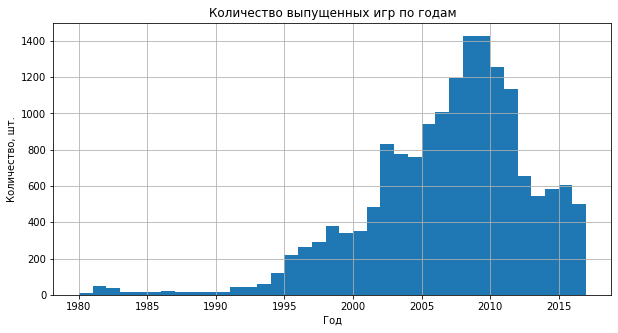

In [27]:
data.year_of_release.hist(bins=37, figsize=(10, 5), range=(1980, 2017))
plt.title('Количество выпущенных игр по годам')
plt.xlabel('Год')
plt.ylabel('Количество, шт.')
plt.show()

С 1991 по 2008 год наблюдается стабильный рост количества выпущенных в год игр до отметки 1420 шт. в год. С 2009 по 2013 год - резкое снижение, которое стабилизировалось около отметок в 500 шт. в год с 2013 по 2016 г. По информации на данном графике наибольший интерес предсталяет период с 2001 по 2016 г, где количество выпущенных игр составляет более 400 штук в год.

Выведем топ-10 платформ с самым большим количеством проданных копий игр на текущий момент.

In [28]:
top_10_platform = (
    data.pivot_table(index='platform', values='total_sales', aggfunc='sum')
    .sort_values('total_sales', ascending=False)
    .iloc[:10]
    .index
)

# Построим сводную таблицу по платформам, где для каждой просуммируем продажи
# Отсортируем значения по общему количеству проданных копий игр в порядке убывания
# Сделаем срез из первых 10 значений
# Оставим только названия платформ

print('Топ-10 игровых платформ по количеству проданных копий игр в порядке убывания:', list(top_10_platform))

Топ-10 игровых платформ по количеству проданных копий игр в порядке убывания: ['PS2', 'X360', 'PS3', 'Wii', 'DS', 'PS', 'PS4', 'GBA', 'PSP', '3DS']


Построим график, где будут отображено количество проданных копий игр по годам для каждой платформы из списка топ-10.

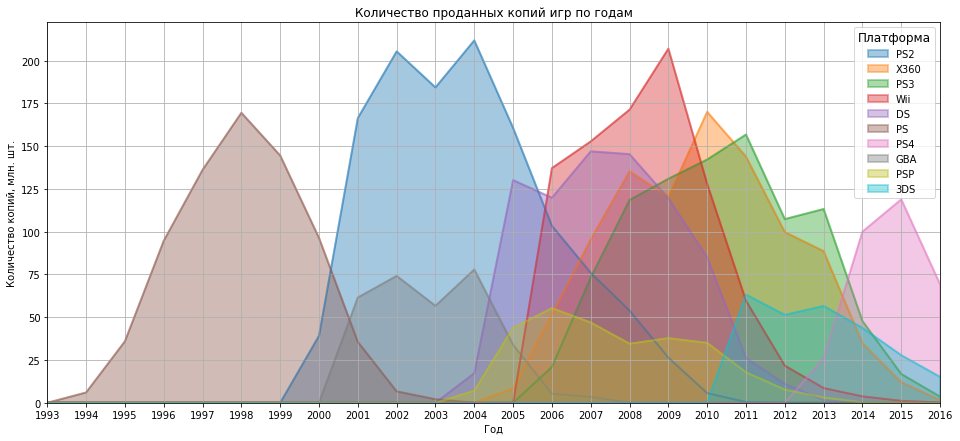

In [29]:
top_platform_by_year = data.pivot_table(index='year_of_release', columns='platform', values='total_sales', aggfunc='sum')\
                            .loc[:, list(top_10_platform)]

# Построим сводную таблицу, где сгруппируем данные по годам. В столбцах с различными типами платформ будет посчитана сумма
# общих продаж копий игр для каждой из платформ
# Из общей сводной таблицы отфильтруем только платформы из списка топ-10

top_platform_by_year.plot(kind='area', grid=True, figsize=(16, 7), legend=True, stacked=False, alpha=0.4, linewidth=2.0)\
.xaxis.set_major_locator(ticker.MultipleLocator(1))

# Построим график типа 'area'. Для наглядности укажем шаг сетки по оси Х - единица.

plt.title('Количество проданных копий игр по годам')
plt.xlabel('Год')
plt.ylabel('Количество копий, млн. шт.')
plt.xlim(1993, 2016)
plt.legend(title='Платформа', title_fontsize='large')
plt.show()

На графике наглядно отображены "расцвет" и "угасание" с течением времени различных игровых платформ из списка топ-10 по объему проданных копий. Время, в течение которого идут продажи игр для платформы в среднем составляет 10 лет. Начиная с 2003 года наблюдается увеличение год к году проданных копий игр одновременно до 6 различных платформ. Каждые 2-5 лет появляется новая платформа, количество продаж игр для которой со временем возрастает до значений сопоставимых с самыми большими на рынке игр. 

В рамках данного исследования будем рассматривать период в 4 года (с 2012 г. по 2015 г. включительно). Таким образом мы сможем отследить динамику продаж по актуальным на текущий момент платформам. Данные за 2016 г. в исследование включать не будем, т.к. выпущенные в течение текущего года игры могут быть не проданы в их потенциальном годовом объеме на текущий момент времени, что исказит данные.

In [30]:
data = data.query('year_of_release >= 2012 and year_of_release != 2016')

### Выявление потенциально прибыльных платформ

Построим график, подобный представленному выше, на котором будут отображены продажи копий игр по всем игровым платформам за период с 2012 по 2015 г.

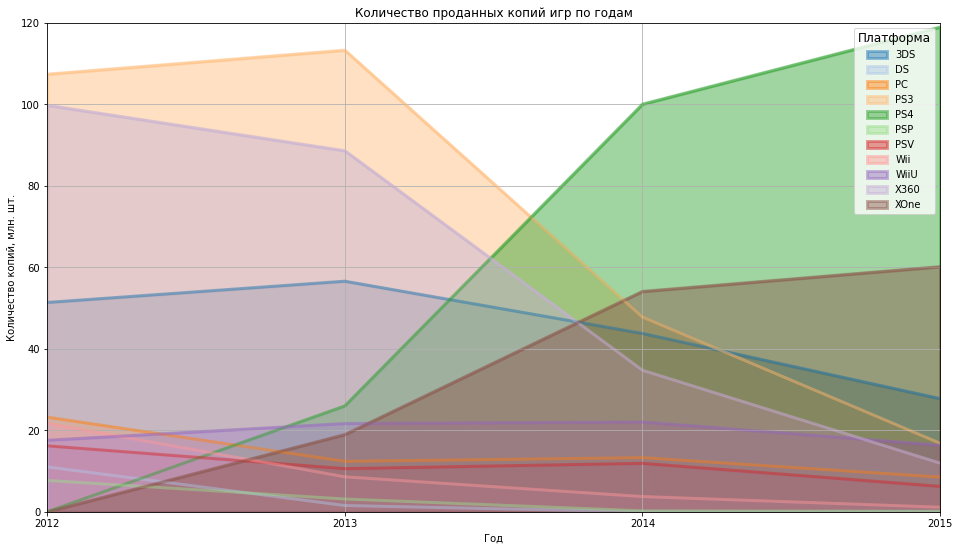

In [31]:
platform_since_2012 = data.pivot_table(index='year_of_release', columns='platform', values='total_sales', aggfunc='sum')

# Построим сводную таблицу, где сгруппируем данные по годам. В столбцах с различными типами платформ будет посчитана сумма
# общих продаж копий игр для каждой из платформ

platform_since_2012.plot(kind='area', grid=True, figsize=(16, 9), legend=True,\
                         stacked=False, alpha=0.45, linewidth=3, color=plt.get_cmap('tab20')(range(12)))\
.xaxis.set_major_locator(ticker.MultipleLocator(1))

# Построим график типа 'area'. Для наглядности укажем шаг сетки по оси Х - единица.

plt.title('Количество проданных копий игр по годам')
plt.xlabel('Год')
plt.ylabel('Количество копий, млн. шт.')
plt.xlim(2012, 2015)
plt.ylim(0, 120)
plt.legend(title='Платформа', title_fontsize='large')
plt.show()

Рассмотрим ситуацию по наиболее актуальным на 2015 год платформам. Платформы PS4 (119 млн. копий) и XOne (60 млн. копий) на 2015 год лидируют по продажам игр, также по ним наблюдается динамика роста продаж игр год к году. Продажи игр на платформы 3DS, WiiU, PSV, PC показывают медленное снижение год к году. По платформам Wii, X360, PS3 наблюдается резкое снижение объемов продаж игр, т.к. им на смену пришли платформы следующего поколения (WiiU, XOne, PS4). 

Потенциально прибыльными платформами являются PS4 и XOne. Также стоит обратить внимание на платформу WiiU, которая судя по динамике объема продаж еще не потеряет свою актуальность в 2017 году.

### Оценка распределения значений продаж игр различных платформ

Построим диаграммы размаха по глобальным продажам игр в разбивке по платформам для оценки распределения значений.

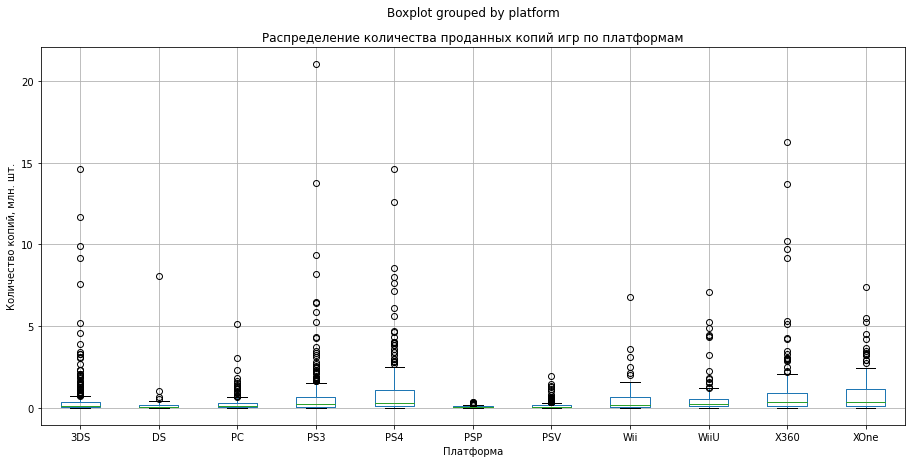

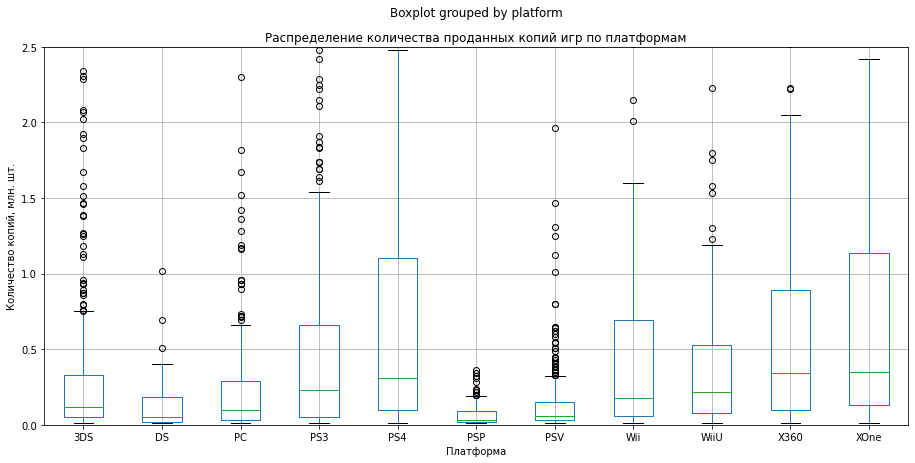

In [32]:
data.boxplot(column='total_sales', by='platform', figsize=(15, 7))

plt.title('Распределение количества проданных копий игр по платформам')
plt.xlabel('Платформа')
plt.ylabel('Количество копий, млн. шт.')
plt.show()


data.boxplot(column='total_sales', by='platform', figsize=(15, 7))

plt.title('Распределение количества проданных копий игр по платформам')
plt.xlabel('Платформа')
plt.ylabel('Количество копий, млн. шт.')
plt.ylim(0, 2.5)
plt.show()

Также выведем статистические данные для столбца `total_sales` с разбивкой по платформам.

In [33]:
data.groupby('platform')['total_sales'].describe()

,count,mean,std,min,25%,50%,75%,max
platform,,,,,,,,
3DS,350.0,0.512771,1.424582,0.01,0.0500,0.115,0.3300,14.60
DS,31.0,0.404839,1.439245,0.01,0.0200,0.050,0.1850,8.06
PC,196.0,0.292857,0.546894,0.01,0.0300,0.100,0.2925,5.14
PS3,455.0,0.626791,1.515258,0.01,0.0500,0.230,0.6600,21.05
PS4,228.0,1.074079,1.899788,0.01,0.0975,0.310,1.1050,14.63
PSP,173.0,0.064682,0.071296,0.01,0.0200,0.030,0.0900,0.36
PSV,326.0,0.137822,0.222652,0.01,0.0300,0.060,0.1500,1.96
Wii,53.0,0.663962,1.174720,0.01,0.0600,0.180,0.6900,6.76
WiiU,133.0,0.583383,1.105384,0.01,0.0800,0.220,0.5300,7.09


При рассмотрении диаграмм размаха можно отметить большое количество выбросов. Однако отбрасывать их не стоит, т.к. для любой из платформ могут встречаться очень успешыне игры, продажи которых значительно выше средних. При исключении таких выбросов из данных потеряется большое количество продаж игр, что может вызвать искажение данных например при подсчете общего количества проданных копий по каждой платформе.

Из представленных выше диаграмм размаха видим, что распределения показателя "количество проданных копий игр" для потенциально прибыльных платформ PS4 и XOne практически идентичны с медианными значениями 0.31 млн копий и 0.35 млн копий соответственно. Это говорит о том, что игры на данных платформах продаются практически одинаково успешно. Стоит отметить, что количество выпущенных игр для платформы PS4 больше (228 против 160 на XOne), также на графике PS4 наблюдается значительно больше выбросов (в том числе с максимальными значениями в 12.5 и 14.5 млн. проданных копий). Это объясняет большую разницу на графике "количество проданных копий по годам" между платформами PS4 и XOne.

Игры для платформы WiiU продаются менее успешно, с медианным значением в 0.22 млн. копий и значительно меньшим разбросом данных.

Все диаграммы размаха скошены в сторону увеличения количества проданных копий игр.

### Определение влияния оценки критиков и пользователей на продажи игр

Посмотрим как влияют на продажи игр для платформы PS4 отзывы пользователей и критиков. Для этого построим диаграмму рассеяния и посчитаем корреляцию между отзывами и продажами.

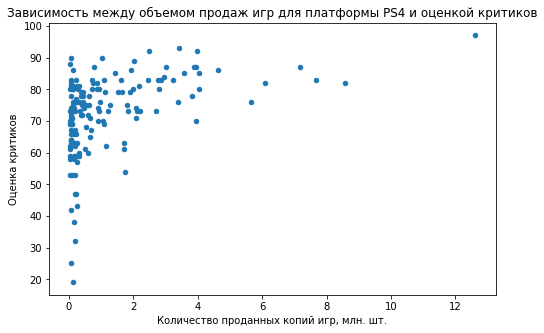

In [34]:
data.query('platform == "PS4"').plot(kind='scatter', x='total_sales', y='critic_score', figsize=(8,5))

plt.title('Зависимость между объемом продаж игр для платформы PS4 и оценкой критиков')
plt.xlabel('Количество проданных копий игр, млн. шт.')
plt.ylabel('Оценка критиков')
plt.show()

Вычислим коэффициент корреляции объема продаж игр для платформы PS4 и оценки критиков.

In [35]:
round((data.query('platform == "PS4"')['total_sales'].corr(data['critic_score'])), 2)

0.43

По диаграмме рассеяния можно заметить, что имеется следующая зависимость: чем более высокую оценку критиков имеет игра, тем больше объем ее продаж. Для игр с объемом продаж до 0.3 млн. копий данная зависимость не прослеживается.

Коэффициент корреляции показывает, что существует незначительная зависимость между количеством проданных копий игры и оценкой критиков.

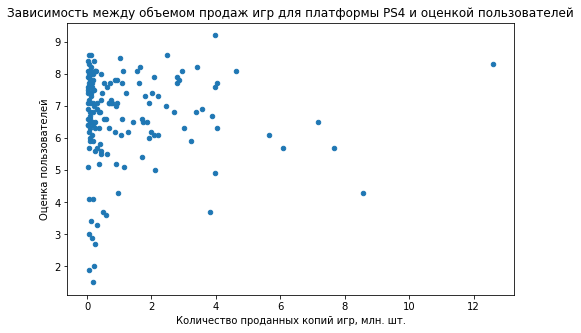

In [36]:
data.query('platform == "PS4"').plot(kind='scatter', x='total_sales', y='user_score', figsize=(8,5))

plt.title('Зависимость между объемом продаж игр для платформы PS4 и оценкой пользователей')
plt.xlabel('Количество проданных копий игр, млн. шт.')
plt.ylabel('Оценка пользователей')
plt.show()

Вычислим коэффициент корреляции объема продаж игр для платформы PS4 и оценки пользователей.

In [37]:
round((data.query('platform == "PS4"')['total_sales'].corr(data['user_score'])), 2)

0.02

Исходя из данных диаграммы рассеяния зависимость между количеством проданных копий игры и оценкой пользователей отсутствует.

Коэффициент корреляции также показывает, что зависимость между количеством проданных копий игры и оценкой пользователей отсутствует.

Проверим, верны ли представленные выше утверждения для игр на других платформах.

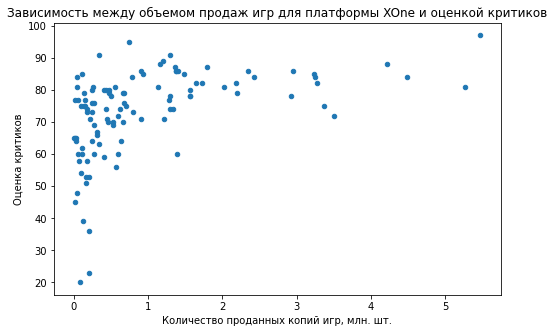

Коэффициент корреляции объема продаж игр для платформы XOne и оценки критиков равен    0.46



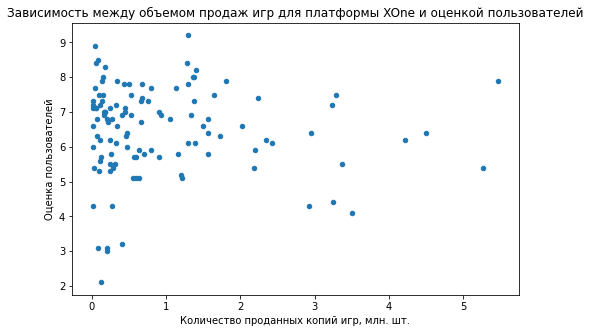

Коэффициент корреляции объема продаж игр для платформы XOne и оценки пользователей равен    -0.04



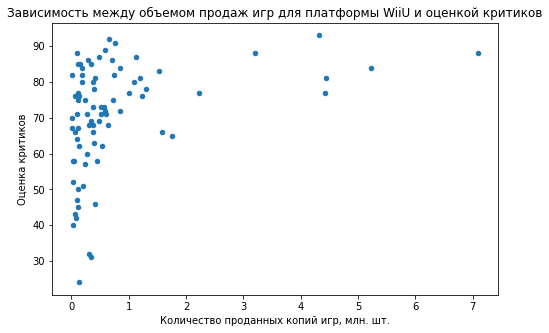

Коэффициент корреляции объема продаж игр для платформы WiiU и оценки критиков равен    0.35



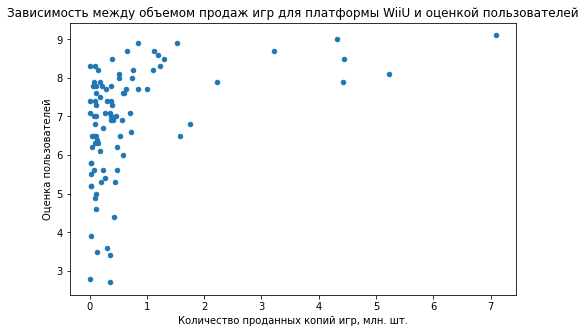

Коэффициент корреляции объема продаж игр для платформы WiiU и оценки пользователей равен    0.41



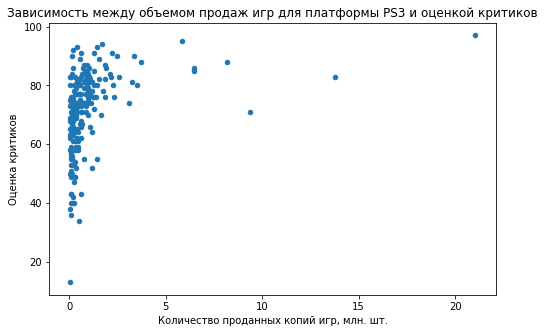

Коэффициент корреляции объема продаж игр для платформы PS3 и оценки критиков равен    0.33



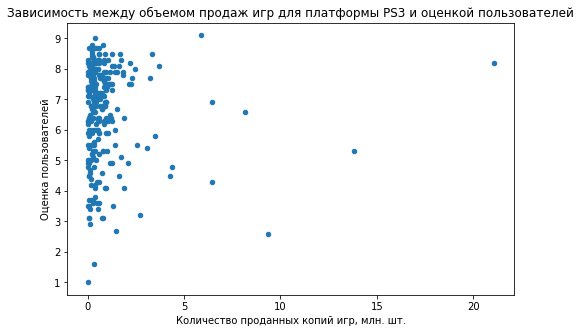

Коэффициент корреляции объема продаж игр для платформы PS3 и оценки пользователей равен    -0.02



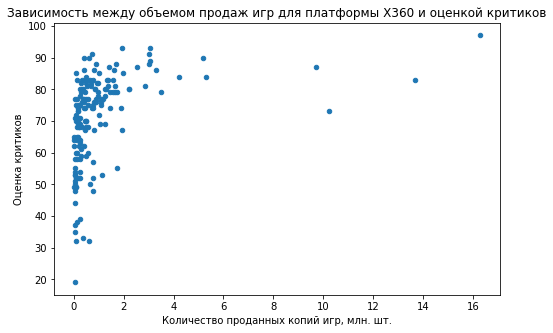

Коэффициент корреляции объема продаж игр для платформы X360 и оценки критиков равен    0.36



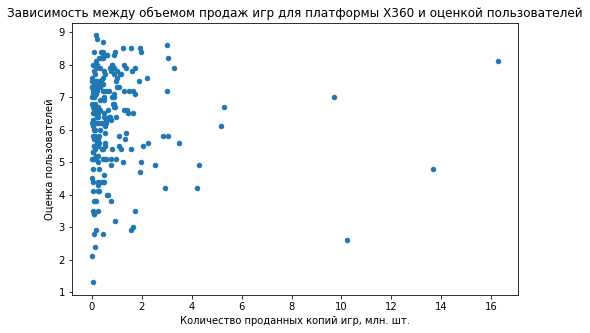

Коэффициент корреляции объема продаж игр для платформы X360 и оценки пользователей равен    -0.01



In [38]:
for i in ['XOne', 'WiiU', 'PS3', 'X360']:

    data[data['platform'] == i].plot(kind='scatter', x='total_sales', y='critic_score', figsize=(8,5))
    plt.title(f'Зависимость между объемом продаж игр для платформы {i} и оценкой критиков')
    plt.xlabel('Количество проданных копий игр, млн. шт.')
    plt.ylabel('Оценка критиков')
    plt.show()
    corr_ratio = round((data[data['platform'] == i]['total_sales'].corr(data['critic_score'])), 2)
    print(f'Коэффициент корреляции объема продаж игр для платформы {i} и оценки критиков равен\
    {corr_ratio}')
    print()
   
    data[data['platform'] == i].plot(kind='scatter', x='total_sales', y='user_score', figsize=(8,5))
    plt.title(f'Зависимость между объемом продаж игр для платформы {i} и оценкой пользователей')
    plt.xlabel('Количество проданных копий игр, млн. шт.')
    plt.ylabel('Оценка пользователей')
    plt.show()
    corr_ratio = round((data[data['platform'] == i]['total_sales'].corr(data['user_score'])), 2)
    print(f'Коэффициент корреляции объема продаж игр для платформы {i} и оценки пользователей равен\
    {corr_ratio}')
    print()
    

Утверждения о том, что:\
-имеется незначительная зависимость между объемами продаж игр и оценкой критиков,\
-зависимость между количеством проданных копий игры и оценкой пользователей отсутствует,\
прослеживаются также для платформы XOne и дополнительно оцененных платформ PS3 и X360.

Для платформы WiiU наличие или отсутствие зависимостей определить невозможно, т.к. для объема продаж игр до 1 млн. копий имеется большой разброс значений, а данных для объема продаж более 1 млн. недостаточно для того, чтобы сделать какие-либо выводы.

### Выявление наиболее и наименее прибыльных жанров игр

Найдем медианные значения проданных копий игр для каждого из жанров. Для наглядности покажем значения на графике. Также построим диаграммы размаха, показывающие распределения количества проданных игр по жанрам.

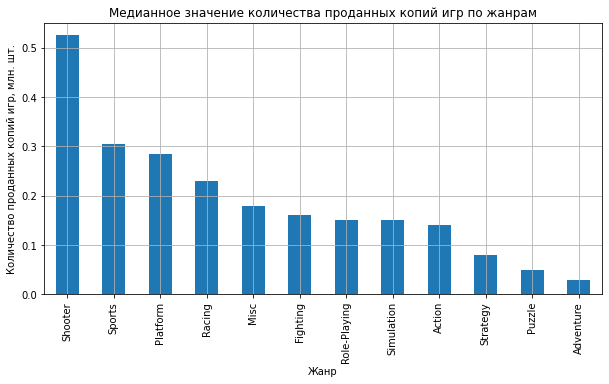

In [39]:
data.pivot_table(index='genre', values='total_sales', aggfunc='median').sort_values('total_sales', ascending=False)\
.plot(kind='bar', figsize=(10,5), grid=True, legend=False)

plt.title('Медианное значение количества проданных копий игр по жанрам')
plt.xlabel('Жанр')
plt.ylabel('Количество проданных копий игр, млн. шт.')
plt.show()

Самыми продаваемыми в целом, соответственно и самыми прибыльными, являются жанры Shooter (самый прибыльный, со средним значением 0,53 млн.копий игр), Sports (0,31 млн. копий), Platform (0,29 млн. копий). Жанры Puzzle (0,05 млн. копий) и Adventure (0,03 млн. копий) являются наименее прибыльными.

Оценим, одинаково ли хорошо продаются игры жанров Shooter, Sports и Platform на разных платформах. Для этого построим диаграммы размаха для этих жанров с разбивкой по платформам. На диаграммах отключим отображение выбросов.

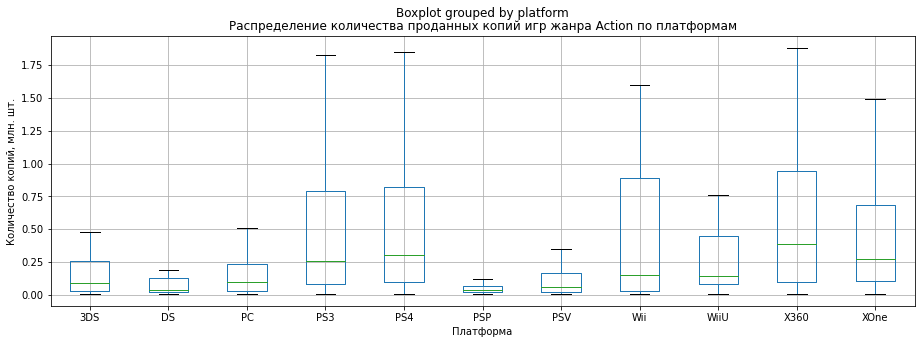

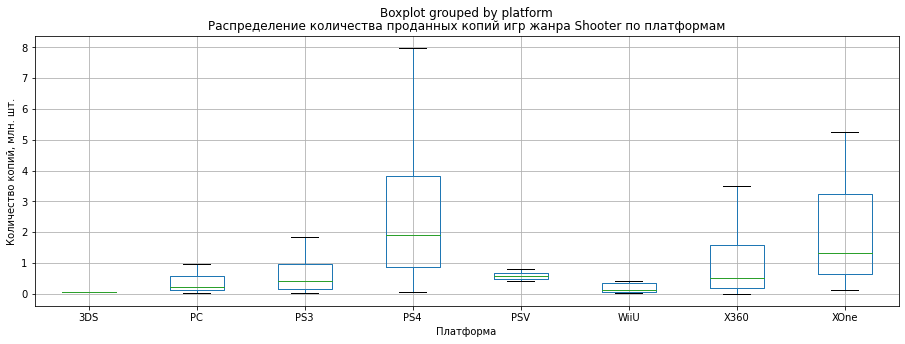

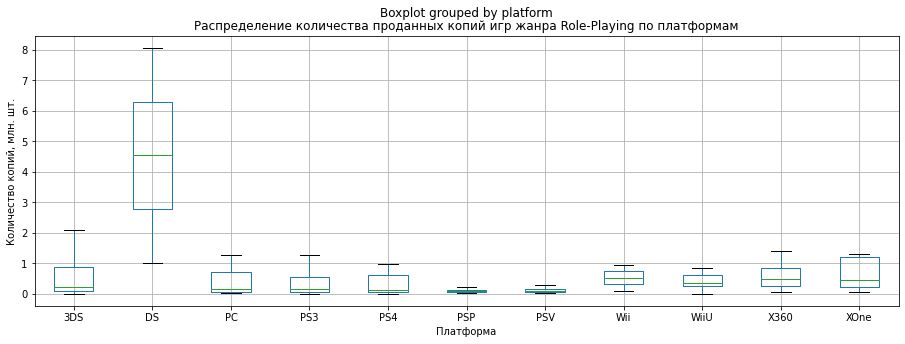

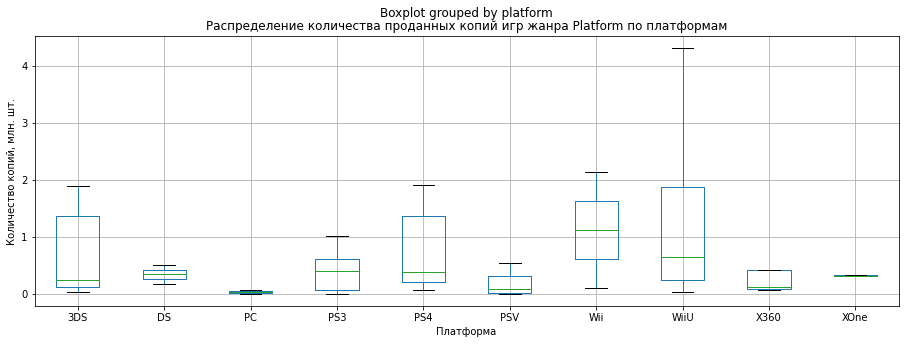

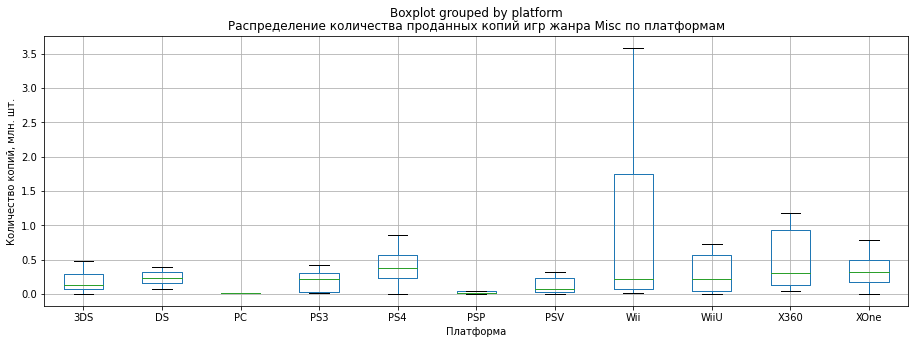

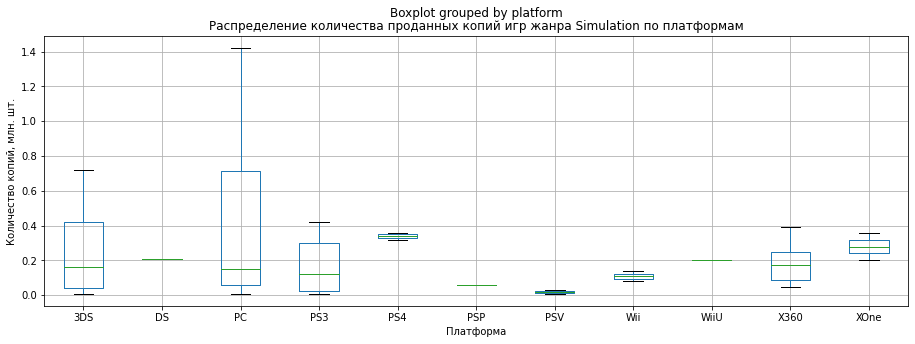

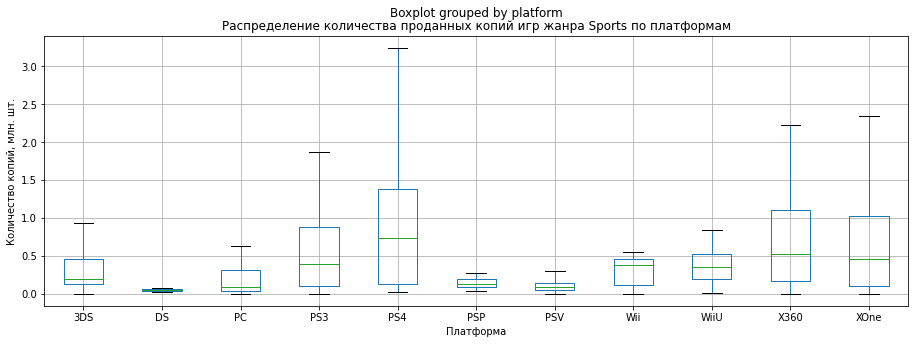

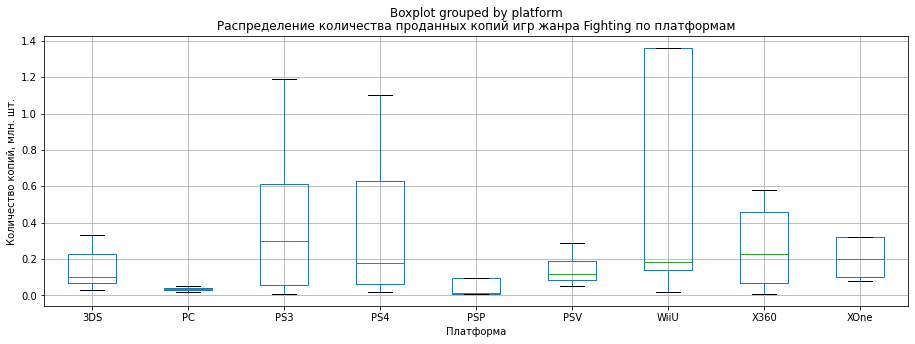

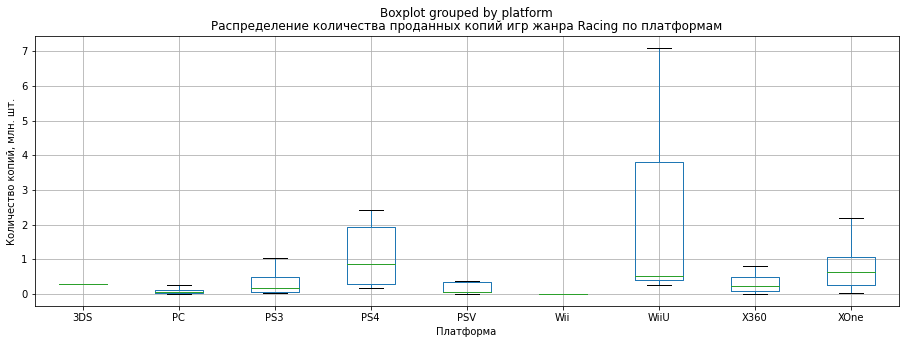

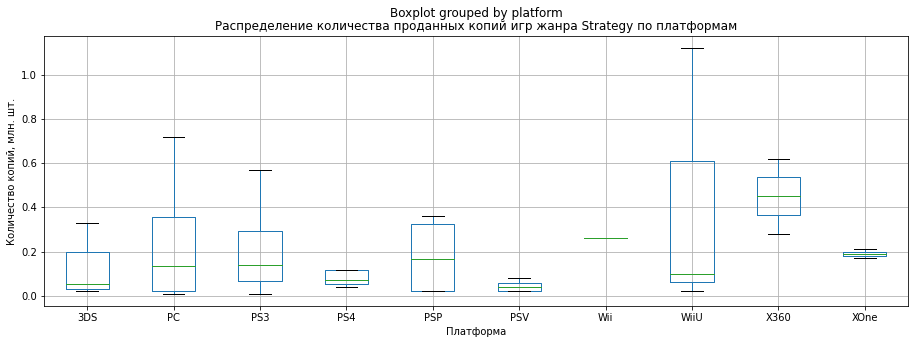

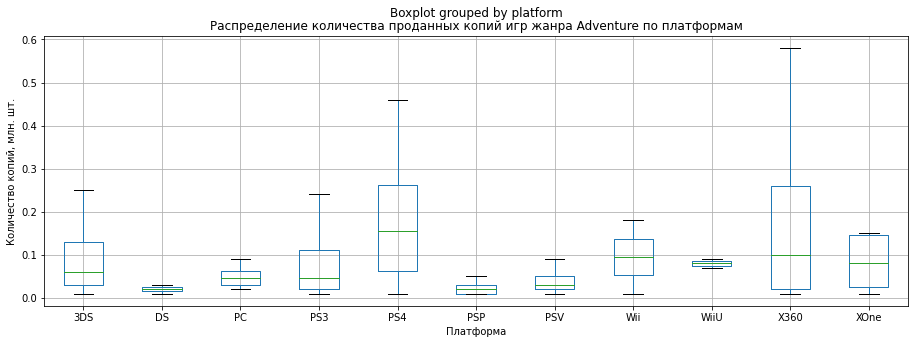

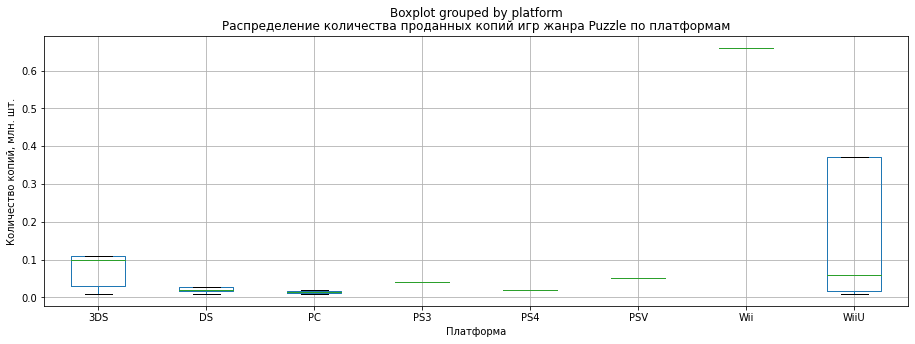

In [40]:
for genre in data['genre'].unique():

    data[data['genre'] == genre].boxplot(column='total_sales', by='platform', figsize=(15, 5), showfliers=False)

    plt.title(f'Распределение количества проданных копий игр жанра {genre} по платформам')
    plt.xlabel('Платформа')
    plt.ylabel('Количество копий, млн. шт.')
    
plt.show()

Жанры Action и Sports имеют высокие продажи по большому количеству платформ.

Далее по жанрам указаны платформы, для которых игры этих жанров продаются лучше всего:
- *Action* - PS3, PS4, X360
- *Shooter* - PS4, XOne
- *Role-playing* - DS
- *Platform* - WiiU
- *Misc* - WiiU
- *Simulation* - PC
- *Sports* - PS3, PS4, XOne, X360
- *Fighting* - WiiU, PS3, PS4
- *Racing* - WiiU
- *Strategy* - WiiU
- *Adventure* - X360, PS4
- *Puzzle* - WiiU

Отдельно выделим наиболее прибыльные жанры игр для выбранных перспективных платформ:
- **PS4** - Shooter, Sports
- **XOne** - Shooter, Sports
- **WiiU** - Platform, Racing

## Определение портрета пользователя для каждого региона

Составим портрет пользователя каждого региона: Северная Америка (NA), Европа (EU), Япония (JP). Для каждого региона выделим топ-5 самых популярных платформ, топ-5 самых популярных жанров и определим для них доли продаж. Также выясним, влияет ли рейтинг ESRB на продажи в каждом из регионов.

Для этого напишем функцию `portrait`, которая будет выводить соответствующие графики.

In [41]:
def portrait(sales_col, data=data): # В параметрах функции прописыватеся столбец с продажами в том или ином регионе,
                                    # и датафрейм, в котором он находится (по умолчанию data)
    
    top5_pl = data.pivot_table(index='platform', values=sales_col, aggfunc='sum')\
    .sort_values(sales_col, ascending=False).reset_index()
    top5_pl.loc[6:, 'platform'] = 'Others'
    top5_pl.loc[6, sales_col] = sum(top5_pl.loc[6:, sales_col])
    top5_pl = top5_pl.iloc[:7].set_index('platform')
    
    # Создадим сводную таблицу с группировкой данных по платформам, по каждой из которых будет выведено общее количество продаж,
    # отсортируем значения по убыванию количества продаж и возьмем 5 самых больших значений,
    # остальные значения, которые не попали в топ-5 сгруппируем, просуммируем и присвоим им значение 'Others'
    
    top5_pl.plot(kind='pie', subplots=True, figsize=(8, 8), autopct="%1.1f%%", legend=False)
    plt.title('Доли продаж игр среди 5 наиболее популярных платформ')
    # По полученным данным построим график типа 'пирог'
    
        
    top5_gnr = data.pivot_table(index='genre', values=sales_col, aggfunc='sum')\
    .sort_values(sales_col, ascending=False).reset_index()
    top5_gnr.loc[6:, 'genre'] = 'Others'
    top5_gnr.loc[6, sales_col] = sum(top5_gnr.loc[6:, sales_col])
    top5_gnr = top5_gnr.iloc[:7].set_index('genre')
    # Создадим сводную таблицу с группировкой данных по жанрам, по каждому из которых будет выведено общее количество продаж,
    # отсортируем значения по убыванию количества продаж и возьмем 5 самых больших значений
    # остальные значения, которые не попали в топ-5 сгруппируем, просуммируем и присвоим им значение 'Others'
    
    top5_gnr.plot(kind='pie', subplots=True, figsize=(8, 8), autopct="%1.1f%%", legend=False)
    plt.title('Доли продаж игр среди 5 наиболее популярных жанров')
    # По полученным данным построим график типа 'пирог'

    
    data_rate_median = data[data[sales_col] != 0].pivot_table(index='rating', values=sales_col, aggfunc='median')\
    .sort_values(sales_col, ascending=False)
    # Создадим сводную таблицу с группировкой данных по категориям рейтинга ESRB, где для каждой из категорий будет показано
    # медианное значение колчества продаж копий игр. Строки с нулевым значением проданных копий не будем брать в расчет
    
    data_rate_median.plot(kind='bar', grid=True, legend=False, figsize=(7, 4))
    plt.title('Медианное значение кол-ва проданных копий игр по категориям рейтинга ESRB')
    plt.xlabel('Категория рейтинга ESRB')
    plt.ylabel('Количество проданных копий игр, млн. шт.')
    plt.show()
    # По полученным данным построим столбчатую диаграмму
    
    data_rate_total = data.pivot_table(index='rating', values=sales_col, aggfunc='sum').sort_values(sales_col, ascending=False)
    # Создадим сводную таблицу с группировкой данных по категориям рейтинга ESRB, где для каждой из категорий будет показано
    # суммарное значение колчества продаж копий игр    
    
    data_rate_total.plot(kind='bar', grid=True, legend=False, figsize=(7, 4))  
    plt.title('Общее количество проданных копий игр по категориям рейтинга ESRB')
    plt.xlabel('Категория рейтинга ESRB')
    plt.ylabel('Количество проданных копий игр, млн. шт.')
    # По полученным данным построим столбчатую диаграмму
    
    return(plt.show())

**Построим портрет пользователя из Северной Америки.**

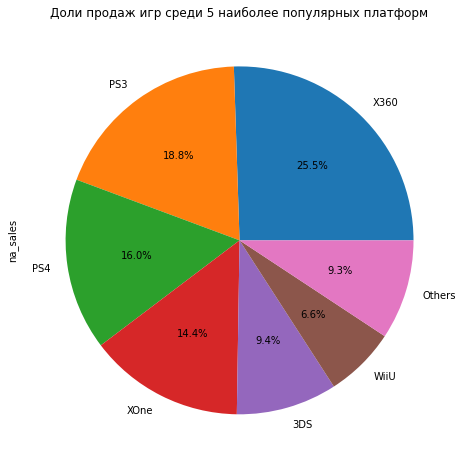

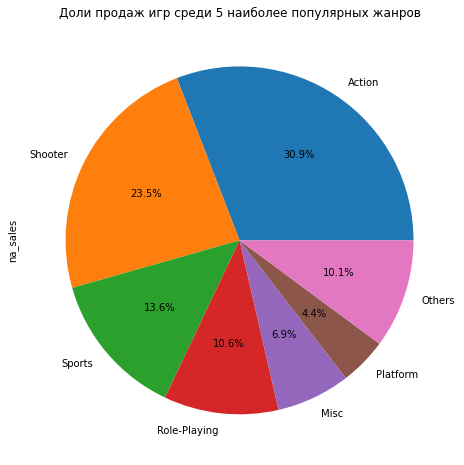

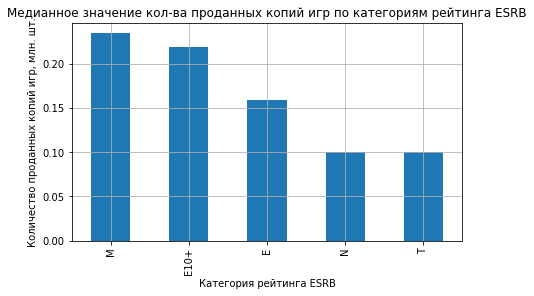

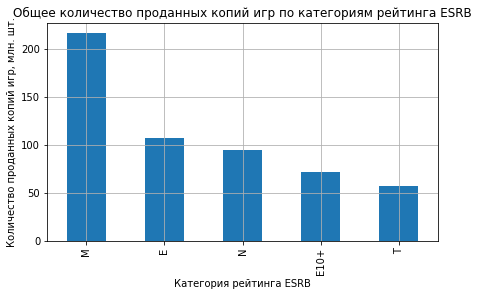

In [42]:
portrait('na_sales')

Портрет пользователя из Северной Америки: в качестве игровой платформы предпочитает Xbox 360, наиболее предпочтительный жанр игр Action.

**Построим портрет пользователя из Европы.**

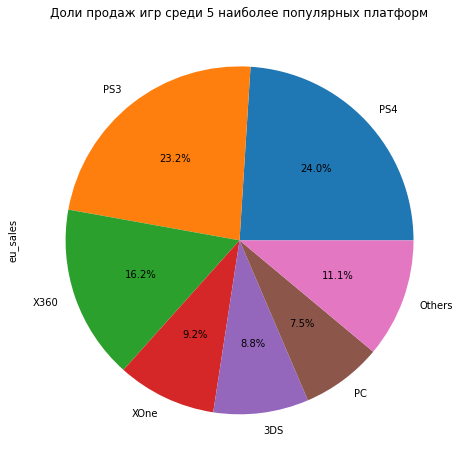

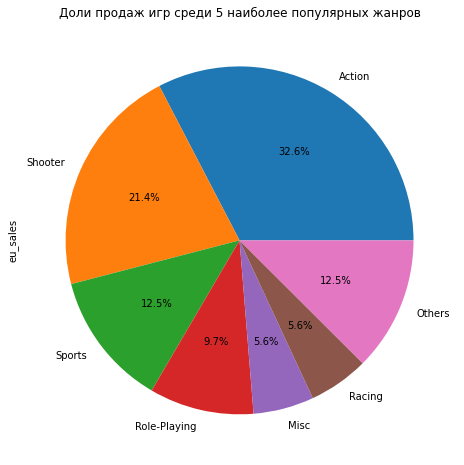

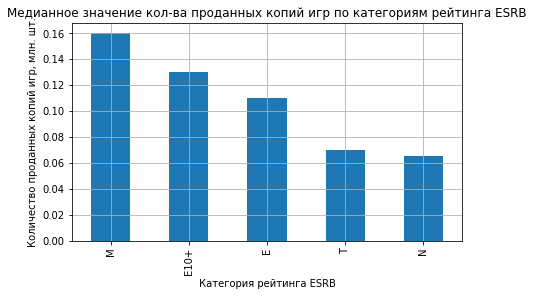

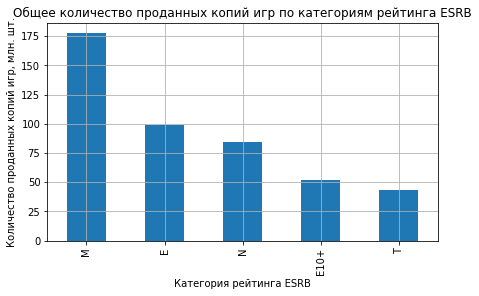

In [43]:
portrait('eu_sales')

Портрет пользователя из Европы: в качестве игровой платформы предпочитает PS4 (чуть менее предпочтительна PS3), наиболее предпочтительный жанр игр Action.

**Построим портрет пользователя из Японии.**

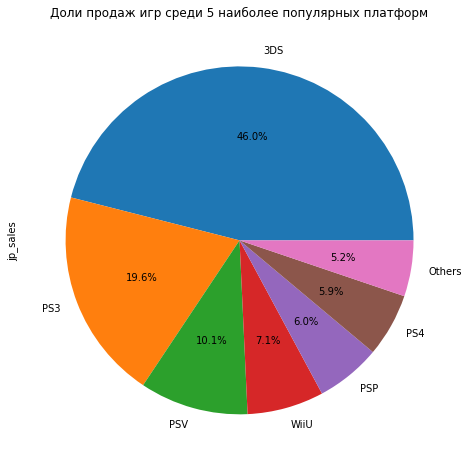

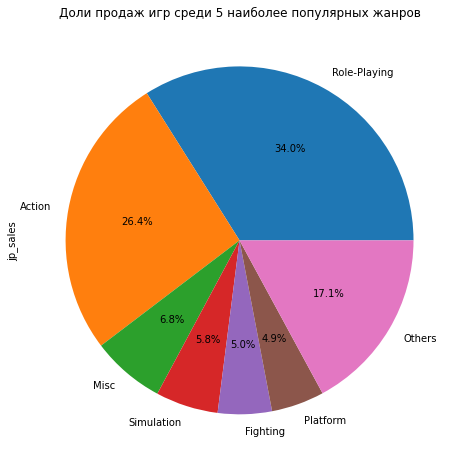

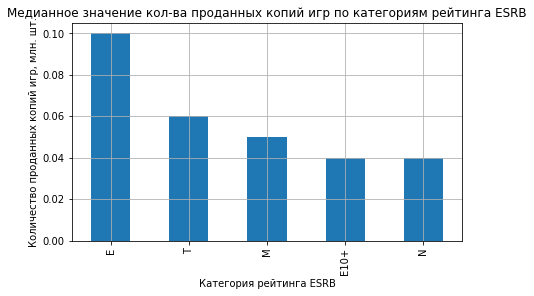

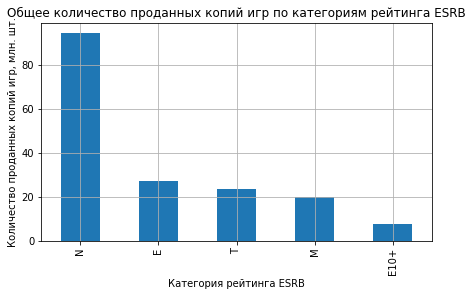

In [44]:
portrait('jp_sales')

In [45]:
# Комментарий ревьюера
temp = data.copy()
print(temp.rating.isna().sum(), temp.rating.isna().sum()/len(temp))
temp.rating.value_counts()

0 0.0


N       1053
M        420
E        329
T        326
E10+     256
Name: rating, dtype: int64

Портрет пользователя из Японии: в качестве игровой платформы предпочитает 3DS, наиболее предпочтительный жанр игр Role-playing.

Помним, что возрастные категории в датафрейме указаны по системе ESRB, которая присваивает категории для игр, продаваемых в США и Канаде. Игры, для которых возрастная категория по системе ESRB не присвоена, выделены в отдельную категорию 'N'.

В странах Северной Америки и Европы самыми продаваемыми являются игры с рейтингом 'для взрослых' ('M'), наименее продаваемыми -  с рейтингом 'подросткам' ('T'). Однако, в данных имеется большое количество игр с категорией 'N'. Если для таких игр оценить возрастной рейтинг по актуальной для них системе оценки, данные могут значительно измениться.

В Японии наиболее продаваемые игры имеют рейтинг 'для всех' ('E'), наименее продаваемые - 'для всех от 10 и старше' ('E10+') и 'N' (рейтинг по системе ESRB не определялся). Наибольшее количество проданных игр имеют категорию 'N', что может значительно исказить данные при присвоении им возрастного рейтинга, основываясь на данных другой системы определения рейтинга.

Отметим, что за рассматриваемый период не встречаются игры с категорями рейтинга ESRB 'только для взрослых' ('AO') и 'для детей младшего возраста' ('EC').

Для более точной оценки влияния возрастной категории необходимо добавить в данные оценки для игр из других систем (PEGI, CERO) и на основании 3 различных систем оценки категоризировать возрастные ограничения, например, присвоив каждой из игр диапазон возраста. С помощью универсальной категоризации можно будет оценить влияние возрастных ограничений на успешность продаж игры.

## Проверка гипотез

Проверим на основе наших данных 2 гипотезы:
1. Средние пользовательские рейтинги платформ Xbox One и PC одинаковые
2. Средние пользовательские рейтинги жанров Action и Sports разные

Для каждой из них сформулируем нулевую и альтернативную гипотезу.

Пороговое значение коэффициента статистической значимости альфа установим на уровне 0.05.

### Гипотеза 1. Средние пользовательские рейтинги платформ Xbox One и PC одинаковые

Гипотезы формулируются таким образом, чтобы в нулевой подразумевалось равеноство двух выборок. В случае, если нулевая гипотеза отвергается, принимается альтернативная, которая опровергает равеноство выборок.

Сформулируем нулевую (H0) и альтернативную(H1) гипотезы.

H0 - средние пользовательские рейтинги игр для платформ Xbox One и PC **равны**.\
H1 - средние пользовательские рейтинги игр для платформ Xbox One и PC **не равны**.

Проверим, равны ли выборки.

In [46]:
xone_user_score = data[(data['platform'] == 'XOne') & (data['user_score'].notna())]['user_score']
pc_user_score = data[(data['platform'] == 'PC') & (data['user_score'].notna())]['user_score']
# присвоим двум переменным выборки с данными по польховательским рейтингам игр для платформ Xbox One и PC

print('Размер выборки с пользовательскими рейтингами игр для Xbox One', xone_user_score.count())
print('Размер выборки с пользовательскими рейтингами игр для PC', pc_user_score.count())

if xone_user_score.count() == pc_user_score.count():
    print('Выборки равны')
else:
    print('Выборки не равны')
# Проверим условие равенства двух выборок

Размер выборки с пользовательскими рейтингами игр для Xbox One 116
Размер выборки с пользовательскими рейтингами игр для PC 161
Выборки не равны


Для проверки гипотезы применим специальный метод python для проверки гипотезы о равенстве среднего двух генеральных совокупностей по взятым из них выборкам. С помощью t-теста проверим сформулированную гипотезу. Сравним уровень значимости заданной статистики (p-value) с заданным критическим уровнем статистической значимости(alpha). Если p-value < alpha, нулевая гипотеза отвергается. Если p-value > alpha - не отвергается. 

In [47]:
alpha = .05 # Зададим критический уровень статистической значимости

results = st.ttest_ind(xone_user_score, pc_user_score, equal_var=False) 
# Проверим гипотезу о равенстве средних двух независимых совокупностей

print('p-значение:', results.pvalue)

if results.pvalue < alpha: # Сравним получившееся p-значение с заданным уровнем статистической значимости
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение: 0.9441751855931831
Не получилось отвергнуть нулевую гипотезу


Значение p-value, равное 0,94 означает, что существует 94% вероятность того, что нулевая гипотеза верна (средние пользовательские рейтинги игр для платформ Xbox One и PC равны).

Для иллюстрации непротиворечивости гипотезы выведем на экран средние пользовательские рейтинги для платформ XOne и PC.

In [48]:
print('Средний пользовательский рейтинг для платформы Xbox One:',\
      round((data[data['platform'] == 'XOne']['user_score'].mean()), 2))
print('Средний пользовательский рейтинг для платформы PC:',\
      round((data[data['platform'] == 'PC']['user_score'].mean()), 2))

Средний пользовательский рейтинг для платформы Xbox One: 6.48
Средний пользовательский рейтинг для платформы PC: 6.47


**Вывод:** средние пользовательские рейтинги игр для платформ Xbox One и PC **одинаковые**.

### Гипотеза 2. Средние пользовательские рейтинги жанров Action и Sports разные

Сформулируем нулевую (H0) и альтернативную(H1) гипотезы.

H0 - средние пользовательские рейтинги игр жанров action и sports **равны**.\
H1 - средние пользовательские рейтинги игр жанров action и sports **не равны**.

Проверим, равны ли выборки.

In [49]:
action_user_score = data[(data['genre'] == 'Action') & (data['user_score'].notna())]['user_score']
sports_user_score = data[(data['genre'] == 'Sports') & (data['user_score'].notna())]['user_score']
# присвоим двум переменным выборки с данными по польховательским рейтингам игр для жанров Action и Sports

print('Размер выборки с пользовательскими рейтингами игр жанра action', action_user_score.count())
print('Размер выборки с пользовательскими рейтингами игр жанра sports', sports_user_score.count())

if action_user_score.count() == sports_user_score.count():
    print('Выборки равны')
else:
    print('Выборки не равны')
# Проверим условие равенства двух выборок

Размер выборки с пользовательскими рейтингами игр жанра action 438
Размер выборки с пользовательскими рейтингами игр жанра sports 158
Выборки не равны


Проверим сформулированную гипотезу.

In [50]:
alpha = .05

results = st.ttest_ind(action_user_score, sports_user_score, equal_var=False) 


print('p-значение:', results.pvalue)

if results.pvalue < alpha:
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение: 2.7671307856639633e-18
Отвергаем нулевую гипотезу


Значение p-value, равное 2e-18 означает, что существует ~0% вероятность того, что нулевая гипотеза верна (средние пользовательские рейтинги игр жанров action и sports равны). Нулевая гипотеза отвергается.

Для иллюстрации непротиворечивости гипотезы выведем на экран средние пользовательские рейтинги для жанров игр Action и Sports.

In [51]:
print('Средний пользовательский рейтинг для жанра игр Action:',\
      round((data[data['genre'] == 'Action']['user_score'].mean()), 2))
print('Средний пользовательский рейтинг для жанра игр Sports:',\
      round((data[data['genre'] == 'Sports']['user_score'].mean()), 2))

Средний пользовательский рейтинг для жанра игр Action: 6.86
Средний пользовательский рейтинг для жанра игр Sports: 5.46


**Вывод:** средние пользовательские рейтинги игр жанров action и sports **разные**.

# Общий вывод

На основании данных о продажах игр (за период до 2016 года), полученных из открытых источников выявлены закономерности, которые определяют успешность игры.

Для целей данного исследования из начального датафрейма отобраны данные за период **с 2012 по 2015 г.** включительно. Данные за 2016 г. в исследование включать не будем, т.к. выпущенные в течение текущего года игры могут быть не проданы в их потенциальном годовом объеме на текущий момент времени, что исказит данные.

При рассмотрении исторических данных установлено следующее:
- время, в течение которого ведутся продажи игр для платформы в среднем составляет 10 лет (можно назвать это "сроком жизни платформы" на рынке игр);
- каждые 2-5 лет появляется новая платформа, количество продаж игр для которой со временем возрастает до значений сопоставимых с самыми большими на рынке игр.

На основании данных за выбранный период выявлены потенциально прибыльные платформы **Xbox One** и **Playstation 4**, уровни продаж игр для которых находятся приблизительно на одинаковых уровнях с медианными значениями в 0,35 и 0,31 млн. копий соответственно. Также стоит обратить внимание на платформу **Wii U**, которая несмотря на снижающиеся продажи игр (медианное значение продаж игр на конец 2015 г. составляет 0.22 млн. копий), вероятно еще не потеряет свою актуальность в 2017 г.

Выявлена **незначительная зависимость между объемами продаж игр и оценкой критиков: чем выше оценка, тем больше копий игры продано**. Зависимость между количеством проданных копий игры и оценкой пользователей отсутствует.

Самыми продаваемыми, соответственно и самыми прибыльными, являются жанры **Shooter** (самый прибыльный, со средним значением 0,53 млн.копий игр), **Sports** (0,31 млн. копий), **Platform** (0,29 млн. копий). Жанры Puzzle (0,05 млн. копий) и Adventure (0,03 млн. копий) являются наименее прибыльными.

**Жанры Action и Sports имеют высокие продажи по большому количеству платформ.**

Далее по жанрам указаны платформы, для которых игры этих жанров продаются лучше всего:
- *Action* - PS3, PS4, X360
- *Shooter* - PS4, XOne
- *Role-playing* - DS
- *Simulation* - PC
- *Sports* - PS3, PS4, XOne, X360
- *Fighting* - WiiU, PS3, PS4
- *Adventure* - X360, PS4
- *Platform, Misc, Racing, Puzzle* - WiiU

Игры жанров **Shooter** и **Sports** являются наиболее прибыльными для перспективных платформ **Playstation 4** и **Xbox One**.

Определены **портреты пользователей разных регионов**:
- Северная Америка: в качестве игровой платформы предпочитает Xbox 360, наиболее предпочтительный жанр игр Action
- Европа: в качестве игровой платформы предпочитает Playstation 4 (чуть менее предпочтительна Playstation 3), наиболее предпочтительный жанр игр Action
- Япония: в качестве игровой платформы предпочитает Nintendo 3DS, наиболее предпочтительный жанр игр Role-playing

Для **стран Европы и Северной Америки** наиболее продаваемые игры имеют категорию возрастного рейтинга **'для взрослых' ('M')**.

**На основании имеющихся данных невозможно достоверно определить влияние категории возрастного рейтинга на успешность продаж игр в Японии**, т.к. в датасете имеются данные только по категориям системы ESRB, которая определяет категорию возрастного рейтинга только для игр, продающихся в США и Канаде.

Для достоверной оценки влияния возрастной категории необходимо добавить в данные оценки для игр из других систем (PEGI, CERO) и на основании 3 различных систем оценки категоризировать возрастные ограничения, например, присвоив каждой из игр диапазон возраста. С помощью универсальной категоризации можно будет оценить влияние возрастных ограничений на успешность продаж игры.

В рамках исследования проверены и **подтверждены** 2 гипотезы:
- Средние пользовательские рейтинги платформ Xbox One и PC одинаковые
- Средние пользовательские рейтинги жанров Action и Sports разные

**Основные тезисы для планирования рекламных кампаний на 2017 г.**

1. Платформы Xbox One и Playstation 4 наиболее прибыльны.
2. Игры с высокой оценкой критиков продаются более успешно.
3. На глобальном рынке наиболее прибыльными являются жанры игр Shooter, Sports, Platform.
4. Жанры Action и Sports имеют высокие продажи по большому количеству платформ.
5. Игры жанров Shooter и Sports являются наиболее прибыльными для платформ Playstation 4 и Xbox One.
6. Для рекламы игр в различных регионах рекомендуется ориентироваться на описанные выше портреты пользователей.

**При планировании рекламных компаний на 2017 г. целесообразно сделать основной акцент на игры жанров Shooter и Sports для платформ Playstation 4 и Xbox One в Европе. При выборе конкретных игр стоит уделять внимание играм с высокой оценкой критиков.**